In [1]:
from pathlib import Path

import ll
import rich

run_id = "uirlcewv"
run_dir = Path(
    f"/net/csefiles/coc-fung-cluster/nima/shared/experiment-data/lltrainer/{run_id}/"
)
assert (
    run_dir.exists() and run_dir.is_dir()
), f"run_dir: {run_dir} does not exist or is not a directory"
print(run_dir)

ll.pretty()
ll.snapshot.load_python_path_from_run(run_dir)

TensorBoard/TensorBoardX not found. Disabling TensorBoardLogger. Please install TensorBoard with `pip install tensorboard` or TensorBoardX with `pip install tensorboardx` to enable TensorBoard logging.


/net/csefiles/coc-fung-cluster/nima/shared/experiment-data/lltrainer/uirlcewv


[16:09:08] CRITICAL Added                                                                           ]8;id=577591;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/ll/src/ll/snapshot.py\snapshot.py]8;;\:]8;id=9718;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/ll/src/ll/snapshot.py#148\148]8;;\
                    /net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/af0845c2-68                
                    dd-464a-971c-0f44ccfd3eec/snapshot/ll_snapshot to sys.path. Modules: jmppeft                   

In [2]:
import os

os.environ["LL_DISABLE_TYPECHECKING"] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "3"


import torch

torch.no_grad().__enter__()
torch.inference_mode().__enter__()

In [3]:
ckpt_path = run_dir / "checkpoint" / "last.ckpt"
# If the file is a symlink, get the target
if ckpt_path.is_symlink():
    print(f"Symlink found {ckpt_path} => {ckpt_path.resolve()}")
    ckpt_path = ckpt_path.resolve()

ckpt_path

Symlink found /net/csefiles/coc-fung-cluster/nima/shared/experiment-data/lltrainer/uirlcewv/checkpoint/last.ckpt => /net/csefiles/coc-fung-cluster/nima/shared/experiment-data/lltrainer/uirlcewv/checkpoint/epoch=7-step=181096-val_matbench_discovery_force_mae=0.051152195781469345.ckpt


Path('/net/csefiles/coc-fung-cluster/nima/shared/experiment-data/lltrainer/uirlcewv/checkpoint/epoch=7-step=181096-val_matbench_discovery_force_mae=0.051152195781469345.ckpt')

In [4]:
from jmppeft.tasks.finetune.base import FinetuneMatBenchDiscoveryIS2REDatasetConfig

dataset_config = FinetuneMatBenchDiscoveryIS2REDatasetConfig(
    # sample_n=DatasetSampleNConfig(sample_n=16, seed=42)
)
print(dataset_config)

dataset_og = dataset_config.create_dataset()
dataset_og, len(dataset_og)

           CRITICAL Type checking is disabled due to the environment variable                       ]8;id=434439;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/ll/src/ll/typecheck.py\typecheck.py]8;;\:]8;id=789521;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/ll/src/ll/typecheck.py#55\55]8;;\
                    LL_DISABLE_TYPECHECKING.                                                                       

[16:09:09] INFO     PyTorch version 2.2.2 available.                                                   ]8;id=892716;file:///net/csefiles/coc-fung-cluster/nima/miniforge3/envs/jmp-peft/lib/python3.11/site-packages/datasets/config.py\config.py]8;;\:]8;id=394473;file:///net/csefiles/coc-fung-cluster/nima/miniforge3/envs/jmp-peft/lib/python3.11/site-packages/datasets/config.py#58\58]8;;\


Loading 'wbm_summary' from cached file at '/nethome/nsg6/.cache/matbench-discovery/1.0.0/wbm/2023-12-13-wbm-summary.csv.gz'


(<jmppeft.datasets.mpd_is2re.MatBenchDiscoveryIS2REDataset at 0x7f840f8dd0d0>,
 256963)

In [5]:
from jmppeft.tasks.finetune import matbench_discovery as M

default_dtype = torch.float32
model = M.MatbenchDiscoveryModel.load_checkpoint(
    ckpt_path,
    # hparams=hparams,
    map_location="cuda",
)
model = model.to(default_dtype)
model

[16:09:39] CRITICAL Using regular backbone                                                              ]8;id=889248;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/af0845c2-68dd-464a-971c-0f44ccfd3eec/snapshot/ll_snapshot/jmppeft/tasks/finetune/base.py\base.py]8;;\:]8;id=242888;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/af0845c2-68dd-464a-971c-0f44ccfd3eec/snapshot/ll_snapshot/jmppeft/tasks/finetune/base.py#605\605]8;;\

Unrecognized arguments:  dict_keys(['name', 'learnable_rbf', 'learnable_rbf_stds', 'unique_basis_per_layer', 'dropout', 'edge_dropout', 'ln_per_layer', 'scale_factor_to_ln'])


           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=472995;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/af0845c2-68dd-464a-971c-0f44ccfd3eec/snapshot/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=355144;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/af0845c2-68dd-464a-971c-0f44ccfd3eec/snapshot/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=165863;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/af0845c2-68dd-464a-971c-0f44ccfd3eec/snapshot/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=292038;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/af0845c2-68dd-464a-971c-0f44ccfd3eec/snapshot/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=275203;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/af0845c2-68dd-464a-971c-0f44ccfd3eec/snapshot/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=649296;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/af0845c2-68dd-464a-971c-0f44ccfd3eec/snapshot/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=324001;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/af0845c2-68dd-464a-971c-0f44ccfd3eec/snapshot/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=816247;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/af0845c2-68dd-464a-971c-0f44ccfd3eec/snapshot/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=427455;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/af0845c2-68dd-464a-971c-0f44ccfd3eec/snapshot/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=101620;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/af0845c2-68dd-464a-971c-0f44ccfd3eec/snapshot/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=732610;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/af0845c2-68dd-464a-971c-0f44ccfd3eec/snapshot/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=354031;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/af0845c2-68dd-464a-971c-0f44ccfd3eec/snapshot/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=321202;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/af0845c2-68dd-464a-971c-0f44ccfd3eec/snapshot/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=168431;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/af0845c2-68dd-464a-971c-0f44ccfd3eec/snapshot/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

[16:09:42] CRITICAL Constructed backbone with dlora=None                                                ]8;id=891645;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/af0845c2-68dd-464a-971c-0f44ccfd3eec/snapshot/ll_snapshot/jmppeft/tasks/finetune/base.py\base.py]8;;\:]8;id=85389;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/af0845c2-68dd-464a-971c-0f44ccfd3eec/snapshot/ll_snapshot/jmppeft/tasks/finetune/base.py#616\616]8;;\

           INFO     Registered 12 shared parameters                                         ]8;id=291067;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/ll/src/ll/model/modules/shared_parameters.py\shared_parameters.py]8;;\:]8;id=286200;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/ll/src/ll/model/modules/shared_parameters.py#72\72]8;;\

           INFO     List of ignored parameters: []                                                      ]8;id=721797;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/af0845c2-68dd-464a-971c-0f44ccfd3eec/snapshot/ll_snapshot/jmppeft/tasks/finetune/base.py\base.py]8;;\:]8;id=300356;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/af0845c2-68dd-464a-971c-0f44ccfd3eec/snapshot/ll_snapshot/jmppeft/tasks/finetune/base.py#694\694]8;;\

           CRITICAL Freezing 0 parameters (0.00%) out of 43,146,824 total parameters (43,146,824        ]8;id=649713;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/af0845c2-68dd-464a-971c-0f44ccfd3eec/snapshot/ll_snapshot/jmppeft/tasks/finetune/base.py\base.py]8;;\:]8;id=67275;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/af0845c2-68dd-464a-971c-0f44ccfd3eec/snapshot/ll_snapshot/jmppeft/tasks/finetune/base.py#923\923]8;;\
                    trainable)                                                                                     

MatbenchDiscoveryModel(config=MatbenchDiscoveryConfig(name=mptrj-jmps-bsz16-linrefenergy-lr8e-05-ln-direct-maceenergy-maceforce-rele-ec2.0-fc10.0-sc100.0-posaug_std0.01, project=jmp_mptrj), device=cuda:0)

In [6]:
from collections import Counter

import jmppeft.modules.dataset.dataset_transform as DT
import torch.utils._pytree as tree
from lightning.fabric.utilities.apply_func import move_data_to_device
from torch_geometric.data import Batch, Data


def data_transform(data: Data):
    data = model.data_transform(data)
    data = Data.from_dict(
        tree.tree_map(
            lambda x: x.type(default_dtype)
            if torch.is_tensor(x) and torch.is_floating_point(x)
            else x,
            data.to_dict(),
        )
    )
    return data


def composition(data: Batch):
    return dict(Counter(data.atomic_numbers.tolist()))


num_items = 1024

dataset = DT.transform(dataset_og, data_transform)
dataset = DT.sample_n_transform(dataset, n=num_items, seed=42)


idx = 32
data = Batch.from_data_list([dataset[idx]])
rich.print(data.to_dict(), composition(data))

{
    'pos': tensor[11, 3] n=33 x∈[-4.287, 6.937] μ=1.411 σ=2.423,
    'id': ['wbm-3-72883'],
    'atomic_numbers': tensor[11] i64 x∈[50, 79] μ=62.000 σ=14.269,
    'cell': tensor[1, 3, 3] n=9 x∈[-3.509, 6.938] μ=1.065 σ=4.112 [[[6.029, 0., -3.509], [-2.037, 5.674, -3.509], 
[0., 0., 6.938]]],
    'y_formation': tensor[1] [-0.236],
    'y_formation_correction': tensor[1] [0.],
    'y_above_hull': tensor[1] [0.093],
    'natoms': tensor[1] i64 [11],
    'pos_noise': tensor[11, 3] n=33 x∈[-0.028, 0.020] μ=-0.001 σ=0.010,
    'tags': tensor[11] i64 x∈[2, 2] μ=2.000 σ=0.,
    'fixed': tensor[11] bool all_zeros,
    'batch': tensor[11] i64 all_zeros,
    'ptr': tensor[2] i64 μ=5.500 σ=7.778 [0, 11]
}
{66: 1, 50: 6, 79: 4}

In [7]:
import numpy as np
from jmppeft.modules.relaxer import ModelOutput, Relaxer
from matbench_discovery.energy import get_e_form_per_atom

USE_Y_RELAXED = False
LINREF = np.load(
    "/net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/notebooks/mptrj_linref.npy"
)


def model_fn(data, initial_data, *, use_y_relaxed: bool = USE_Y_RELAXED) -> ModelOutput:
    model_out = model.forward_denormalized(data)

    energy = model_out["y_relaxed"] if use_y_relaxed else model_out["y"]
    # energy = model_out["y"]
    # relaxed_energy = model_out["y_relaxed"]
    forces = model_out["force"]
    stress = model_out["stress"]

    # Undo the linref
    if LINREF is not None:
        energy = energy + LINREF[data.atomic_numbers.cpu().numpy()].sum()

    # JMP-S v2 energy is corrected_energy, i.e., DFT total energy
    # This energy is now DFT total energy, we need to convert it to formation energy per atom
    energy = get_e_form_per_atom(
        {
            "composition": composition(data),
            "energy": energy,
        }
    )
    assert isinstance(energy, torch.Tensor)
    # assert isinstance(relaxed_energy, torch.Tensor)

    # Add the correction factor
    if False:
        energy += initial_data.y_formation_correction.item()

    # energy, relaxed_energy = tree.tree_map(
    #     lambda energy: energy.view(1), (energy, relaxed_energy)
    # )
    energy = energy.view(1)
    forces = forces.view(-1, 3)
    stress = stress.view(1, 3, 3) if stress.numel() == 9 else stress.view(1, 6)

    return {
        "energy": energy,
        # "relaxed_energy": relaxed_energy,
        "forces": forces,
        "stress": stress,
    }


data = move_data_to_device(data, model.device)
model_fn(data, data)

{'energy': tensor[1] cuda:0 [0.088],
 'forces': tensor[11, 3] n=33 x∈[-0.303, 0.314] μ=0.001 σ=0.168 cuda:0,
 'stress': tensor[1, 3, 3] n=9 x∈[-0.134, -0.002] μ=-0.046 σ=0.066 cuda:0 [[[-0.133, -0.002, -0.002], [-0.002, -0.133, -0.003], [-0.002, -0.003, -0.134]]]}

In [8]:
from functools import partial

import rich
from jmppeft.modules.relaxer import RelaxerConfig

config = RelaxerConfig(
    compute_stress=True,
    stress_weight=0.1,
    optimizer="FIRE",
    fmax=0.05,
    ase_filter="exp",
)
relaxer = Relaxer(
    config=config,
    model=partial(model_fn, use_y_relaxed=False),
    collate_fn=model.collate_fn,
    device=model.device,
)
rich.print(data.y_formation)
relax_out = relaxer.relax(data)
# rich.print(relax_out)

energy = relax_out.atoms.get_total_energy()
rich.print(energy, data.y_formation)

tensor[1] cuda:0 [-0.236]

      Step     Time          Energy          fmax
FIRE:    0 16:09:44        0.087985        3.187042
FIRE:    1 16:09:44       -0.075482        1.287062
FIRE:    2 16:09:44       -0.119374        0.397141
FIRE:    3 16:09:44       -0.120389        0.396413
FIRE:    4 16:09:44       -0.122194        0.394671
FIRE:    5 16:09:44       -0.124406        0.391366
FIRE:    6 16:09:44       -0.126899        0.382661
FIRE:    7 16:09:45       -0.128779        0.375656
FIRE:    8 16:09:45       -0.130327        0.369155
FIRE:    9 16:09:45       -0.132254        0.365687
FIRE:   10 16:09:45       -0.133802        0.366300
FIRE:   11 16:09:45       -0.136099        0.371665
FIRE:   12 16:09:45       -0.139204        0.375795
FIRE:   13 16:09:45       -0.143196        0.380600
FIRE:   14 16:09:45       -0.147900        0.381380
FIRE:   15 16:09:45       -0.153013        0.384097
FIRE:   16 16:09:45       -0.157222        0.381046
FIRE:   17 16:09:45       -0.167280        0.359299
FIRE:   18 16:

-0.23557524383068085 tensor[1] cuda:0 [-0.236]

In [10]:
from collections import defaultdict
from functools import partial

import numpy as np
from torch.utils.data import DataLoader
from tqdm.auto import tqdm

config = RelaxerConfig(
    compute_stress=True,
    stress_weight=0.1,
    optimizer="FIRE",
    # fmax=0.01,
    # ase_filter="frechet",
    fmax=0.05,
    ase_filter="exp",
)
relaxer = Relaxer(
    config=config,
    model=partial(model_fn, use_y_relaxed=True),
    collate_fn=model.collate_fn,
    device=model.device,
)

dl = DataLoader(
    dataset,
    batch_size=1,
    collate_fn=model.collate_fn,
    shuffle=False,
    num_workers=0,
    pin_memory=True,
)

preds_targets = defaultdict[str, list[tuple[float, float]]](lambda: [])
mae_error = 0.0
mae_count = 0

for data in tqdm(dl, total=len(dl)):
    data = move_data_to_device(data, model.device)
    relax_out = relaxer.relax(data, verbose=False)

    e_form_true = data.y_formation.item()
    e_form_pred = relax_out.atoms.get_total_energy()
    preds_targets["e_form"].append((e_form_pred, e_form_true))

    e_above_hull_true = data.y_above_hull.item()
    e_above_hull_pred = e_above_hull_true + (e_form_pred - e_form_true)
    preds_targets["e_above_hull"].append((e_above_hull_pred, e_above_hull_true))

    mae_error += abs(e_form_pred - e_form_true)
    mae_count += 1
    mae_running = mae_error / mae_count

    nsteps = len(relax_out.trajectory.frames)

    print(
        f"# Steps: {nsteps}; e_form: P={e_form_pred:.4f}, GT={e_form_true:.4f}, Δ={abs(e_form_pred - e_form_true):.4f}, MAE={mae_running:.4f}"
    )

  0%|          | 0/1024 [00:00<?, ?it/s]

# Steps: 18; e_form: P=-0.7984, GT=-0.8008, Δ=0.0025, MAE=0.0025
# Steps: 22; e_form: P=0.0201, GT=-0.0220, Δ=0.0421, MAE=0.0223
# Steps: 11; e_form: P=-0.6326, GT=-0.6088, Δ=0.0238, MAE=0.0228
# Steps: 46; e_form: P=-0.2101, GT=-0.1544, Δ=0.0556, MAE=0.0310
# Steps: 48; e_form: P=-0.3454, GT=-0.1154, Δ=0.2299, MAE=0.0708
# Steps: 16; e_form: P=-0.3935, GT=-0.3905, Δ=0.0030, MAE=0.0595
# Steps: 13; e_form: P=-0.2445, GT=-0.2468, Δ=0.0023, MAE=0.0513
# Steps: 21; e_form: P=-0.5475, GT=-0.4542, Δ=0.0933, MAE=0.0566
# Steps: 13; e_form: P=-1.9630, GT=-1.9089, Δ=0.0540, MAE=0.0563
# Steps: 6; e_form: P=-0.1452, GT=-0.1224, Δ=0.0229, MAE=0.0529
# Steps: 2; e_form: P=-1.8633, GT=-1.8781, Δ=0.0149, MAE=0.0495
# Steps: 5; e_form: P=-1.6046, GT=-1.6101, Δ=0.0054, MAE=0.0458
# Steps: 7; e_form: P=-1.8463, GT=-1.8180, Δ=0.0284, MAE=0.0445
# Steps: 2; e_form: P=-0.3288, GT=-0.3333, Δ=0.0045, MAE=0.0416
# Steps: 13; e_form: P=-0.7178, GT=-0.7299, Δ=0.0121, MAE=0.0397
# Steps: 4; e_form: P=-0.0737, 

{'e_form': {'pred': (1024,), 'true': (1024,)}, 'e_above_hull': {'pred': (1024,), 'true': (1024,)}}

/tmp/ipykernel_3761919/3062433637.py:38: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


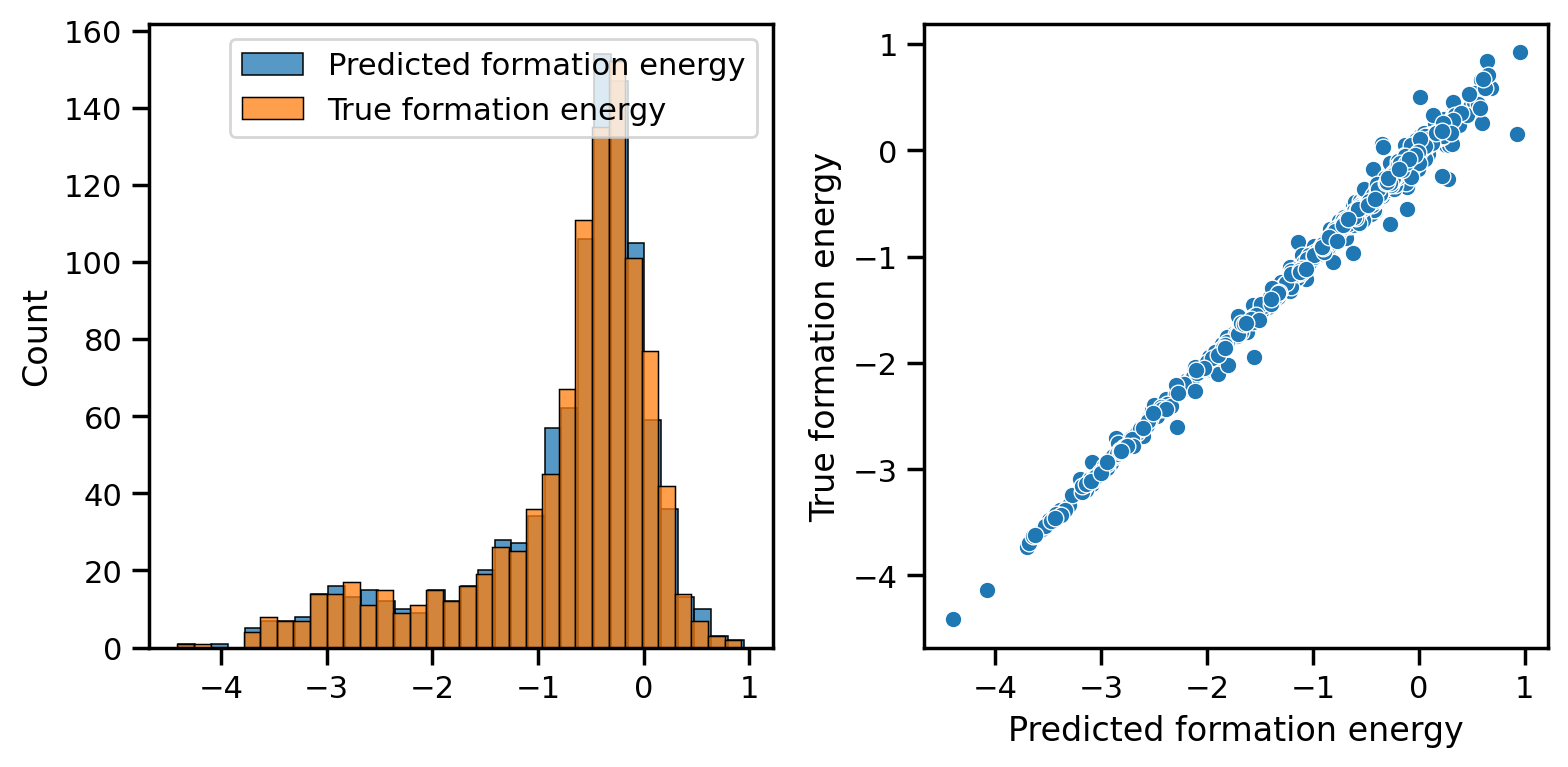

{
    'F1': 0.7602339181286549,
    'DAF': 4.552667578659371,
    'Precision': 0.7647058823529411,
    'Recall': 0.7558139534883721,
    'Accuracy': 0.919921875,
    'TPR': 0.7558139534883721,
    'FPR': 0.046948356807511735,
    'TNR': 0.9530516431924883,
    'FNR': 0.2441860465116279,
    'TP': 130,
    'FP': 40,
    'TN': 812,
    'FN': 42,
    'MAE': 0.03809318047007082,
    'RMSE': 0.07073967484161818,
    'R2': 0.9327548763334998
}

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from matbench_discovery.metrics import stable_metrics

sns.set_context("notebook")

e_form_true, e_form_pred = zip(*preds_targets["e_form"])
e_form_true = np.array(e_form_true)
e_form_pred = np.array(e_form_pred)

e_above_hull_true, e_above_hull_pred = zip(*preds_targets["e_above_hull"])
e_above_hull_true = np.array(e_above_hull_true)
e_above_hull_pred = np.array(e_above_hull_pred)

rich.print(
    {
        "e_form": {"pred": e_form_pred.shape, "true": e_form_true.shape},
        "e_above_hull": {
            "pred": e_above_hull_pred.shape,
            "true": e_above_hull_true.shape,
        },
    }
)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes = axes.flatten()

ax = axes[0]
sns.histplot(e_form_pred, label="Predicted formation energy", ax=ax)
sns.histplot(e_form_true, label="True formation energy", ax=ax)
ax.legend()

ax = axes[1]
sns.scatterplot(y=e_form_true, x=e_form_pred, ax=ax)
ax.set_xlabel("Predicted formation energy")
ax.set_ylabel("True formation energy")

fig.tight_layout()
plt.show()

metrics = stable_metrics(e_above_hull_true, e_above_hull_pred, fillna=False)
rich.print(metrics)

In [12]:
from collections import defaultdict

import numpy as np
from torch.utils.data import DataLoader
from tqdm.auto import tqdm

config = RelaxerConfig(
    compute_stress=True,
    stress_weight=0.1,
    optimizer="FIRE",
    # fmax=0.01,
    # ase_filter="frechet",
    fmax=0.05,
    ase_filter="exp",
)
relaxer = Relaxer(
    config=config,
    model=partial(model_fn, use_y_relaxed=False),
    collate_fn=model.collate_fn,
    device=model.device,
)

dl = DataLoader(
    dataset,
    batch_size=1,
    collate_fn=model.collate_fn,
    shuffle=False,
    num_workers=0,
    pin_memory=True,
)


preds_targets = defaultdict[str, list[tuple[float, float]]](lambda: [])
mae_error = 0.0
mae_count = 0

for data in tqdm(dl, total=len(dl)):
    data = move_data_to_device(data, model.device)
    relax_out = relaxer.relax(data, verbose=False)

    e_form_true = data.y_formation.item()
    e_form_pred = relax_out.atoms.get_total_energy()
    preds_targets["e_form"].append((e_form_pred, e_form_true))

    e_above_hull_true = data.y_above_hull.item()
    e_above_hull_pred = e_above_hull_true + (e_form_pred - e_form_true)
    preds_targets["e_above_hull"].append((e_above_hull_pred, e_above_hull_true))

    mae_error += abs(e_form_pred - e_form_true)
    mae_count += 1
    mae_running = mae_error / mae_count

    nsteps = len(relax_out.trajectory.frames)

    print(
        f"# Steps: {nsteps}; e_form: P={e_form_pred:.4f}, GT={e_form_true:.4f}, Δ={abs(e_form_pred - e_form_true):.4f}, MAE={mae_running:.4f}"
    )

  0%|          | 0/1024 [00:00<?, ?it/s]

# Steps: 17; e_form: P=-0.7933, GT=-0.8008, Δ=0.0075, MAE=0.0075
# Steps: 22; e_form: P=0.0208, GT=-0.0220, Δ=0.0428, MAE=0.0252
# Steps: 12; e_form: P=-0.6297, GT=-0.6088, Δ=0.0209, MAE=0.0237
# Steps: 40; e_form: P=-0.2036, GT=-0.1544, Δ=0.0492, MAE=0.0301
# Steps: 38; e_form: P=-0.3389, GT=-0.1154, Δ=0.2235, MAE=0.0688
# Steps: 17; e_form: P=-0.3898, GT=-0.3905, Δ=0.0007, MAE=0.0574
# Steps: 13; e_form: P=-0.2491, GT=-0.2468, Δ=0.0023, MAE=0.0495
# Steps: 15; e_form: P=-0.5485, GT=-0.4542, Δ=0.0943, MAE=0.0551
# Steps: 13; e_form: P=-1.9658, GT=-1.9089, Δ=0.0568, MAE=0.0553
# Steps: 6; e_form: P=-0.1423, GT=-0.1224, Δ=0.0200, MAE=0.0518
# Steps: 4; e_form: P=-1.8567, GT=-1.8781, Δ=0.0215, MAE=0.0490
# Steps: 5; e_form: P=-1.6058, GT=-1.6101, Δ=0.0042, MAE=0.0453
# Steps: 7; e_form: P=-1.8444, GT=-1.8180, Δ=0.0265, MAE=0.0439
# Steps: 2; e_form: P=-0.3292, GT=-0.3333, Δ=0.0041, MAE=0.0410
# Steps: 13; e_form: P=-0.7163, GT=-0.7299, Δ=0.0136, MAE=0.0392
# Steps: 9; e_form: P=-0.0684, 

{'e_form': {'pred': (1024,), 'true': (1024,)}, 'e_above_hull': {'pred': (1024,), 'true': (1024,)}}

/tmp/ipykernel_3761919/3062433637.py:38: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


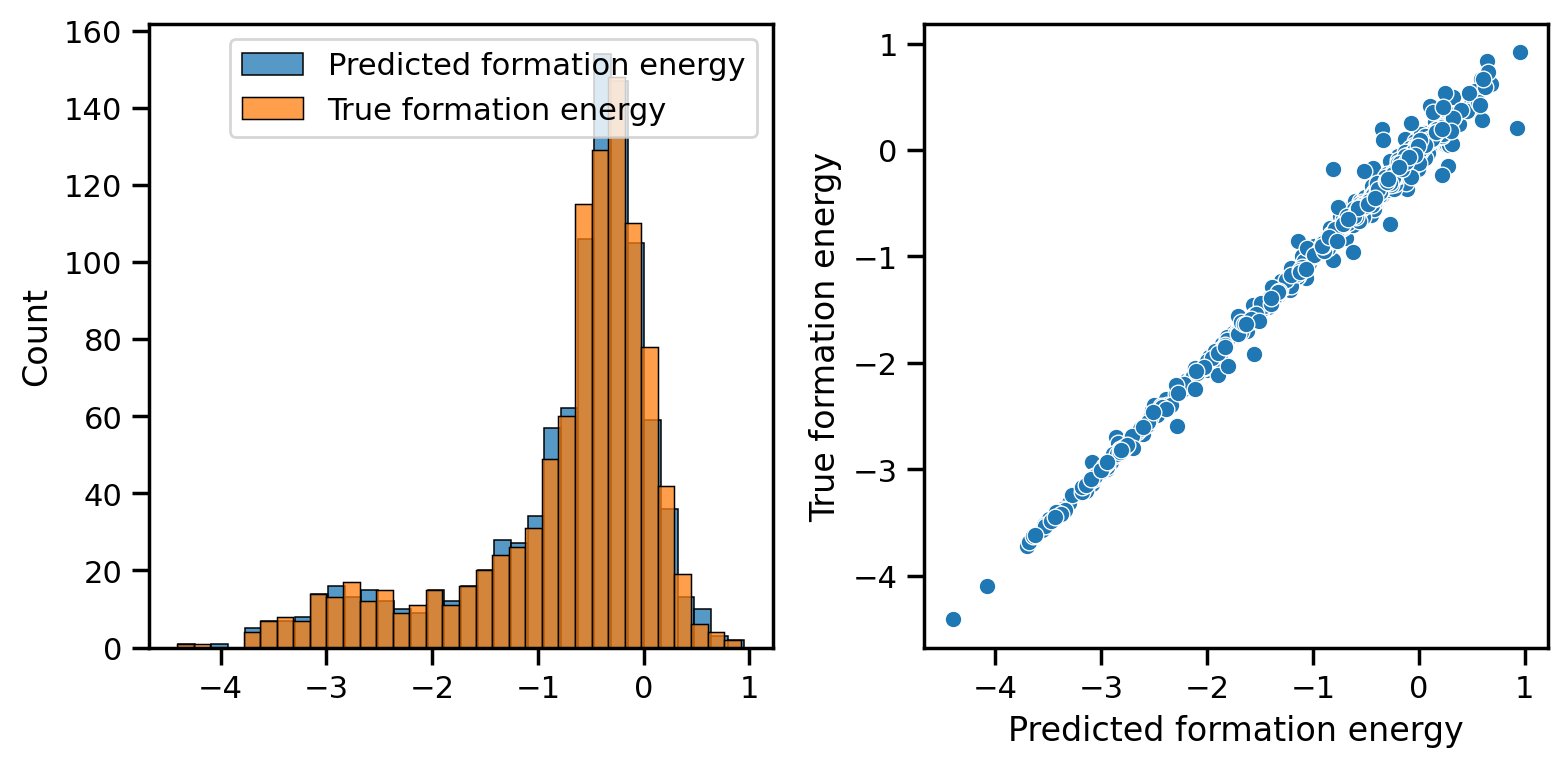

{
    'F1': 0.7416413373860183,
    'DAF': 4.6218275989641135,
    'Precision': 0.7176470588235294,
    'Recall': 0.7672955974842768,
    'Accuracy': 0.9169921875,
    'TPR': 0.7672955974842768,
    'FPR': 0.055491329479768786,
    'TNR': 0.9445086705202312,
    'FNR': 0.23270440251572327,
    'TP': 122,
    'FP': 48,
    'TN': 817,
    'FN': 37,
    'MAE': 0.03980036583260471,
    'RMSE': 0.07418291140120109,
    'R2': 0.9261693492895007
}

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from matbench_discovery.metrics import stable_metrics

sns.set_context("notebook")

e_form_true, e_form_pred = zip(*preds_targets["e_form"])
e_form_true = np.array(e_form_true)
e_form_pred = np.array(e_form_pred)

e_above_hull_true, e_above_hull_pred = zip(*preds_targets["e_above_hull"])
e_above_hull_true = np.array(e_above_hull_true)
e_above_hull_pred = np.array(e_above_hull_pred)

rich.print(
    {
        "e_form": {"pred": e_form_pred.shape, "true": e_form_true.shape},
        "e_above_hull": {
            "pred": e_above_hull_pred.shape,
            "true": e_above_hull_true.shape,
        },
    }
)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes = axes.flatten()

ax = axes[0]
sns.histplot(e_form_pred, label="Predicted formation energy", ax=ax)
sns.histplot(e_form_true, label="True formation energy", ax=ax)
ax.legend()

ax = axes[1]
sns.scatterplot(y=e_form_true, x=e_form_pred, ax=ax)
ax.set_xlabel("Predicted formation energy")
ax.set_ylabel("True formation energy")

fig.tight_layout()
plt.show()

metrics = stable_metrics(e_above_hull_true, e_above_hull_pred, fillna=False)
rich.print(metrics)